In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data_path = '../../data/metadata/'

In [8]:
fandom_list = [i.strip() for i in open('../../data/fandom_filtered_list')]

In [9]:
fandom_list

['arthurian_mythology_&_related_fandoms',
 'marvel',
 'attack_on_titan',
 'ms_paint_adventures',
 'bishoujo_senshi_sailor_moon',
 'naruto',
 'buffy_the_vampire_slayer',
 'dcu',
 'one_direction',
 'doctor_who_&_related_fandoms',
 'dragon_age_all_media_types',
 'haikyuu',
 'shakespare_william_works',
 'hamilton_miranda',
 'sherlock_holmes_&_related_fandoms',
 'harry_potter',
 'hetalia_axis_powers',
 'star_wars_all_media_types',
 'homestuck',
 'supernatural',
 'the_avengers_all_media_types',
 'kuroko_no_basuke',
 'the_walking_dead_&_related_fandoms',
 'les_miserables_all_media_types',
 'tolkien_j_r_r_works_&_related_fandoms']

Number of works in each fandom

In [16]:
fandom_size = {}
for f in fandom_list:
    df = pd.read_csv(os.path.join(data_path, f+'_metadata.tsv'), sep = '\t')
#     print(len(df))
    try:
        df = df.drop(['ChapterIndex', 'URL', 'CompleteDate','UpdateDate','Comments','PublishDate','Notes','Bookmarks'], axis=1)
    except:
        df = df.drop(['ChapterIndex', 'CompleteDate','UpdateDate','Comments','PublishDate','Notes','Bookmarks'], axis=1)
    df = df.drop_duplicates()
#     print(len(df))
    fandom_size[len(df)] = f.split('.')[0]

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
sum(fandom_size.keys())

904760

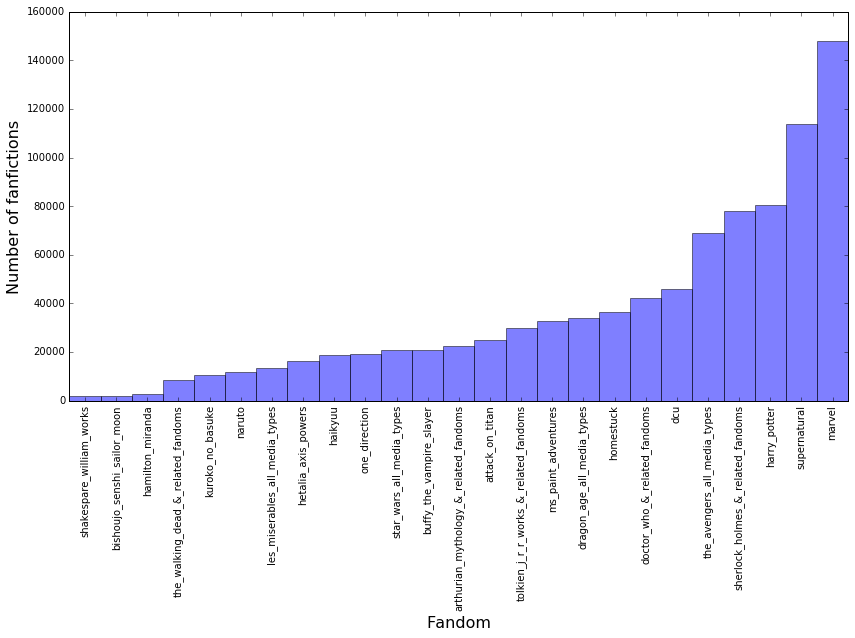

In [18]:
plt.figure()
plt.figure(figsize = (12,9))
idx = np.arange(len(fandom_size))
data = sorted(fandom_size.keys())
labels = [fandom_size[i].replace('_metadata', '') for i in sorted(fandom_size.keys())]
plt.bar(idx, data, 1, alpha = 0.5)
plt.xticks(idx + 0.5,labels,rotation = '90')
plt.xlim(0, 25)
plt.xlabel("Fandom", fontsize = 16)
plt.ylabel("Number of fanfictions", fontsize = 16)
plt.tight_layout()
plt.savefig("fandom_size.png", type="png")

Length distribution

In [6]:
def create_timelist(df):
    timelist = df.PublishDate.drop_duplicates().tolist()
    timelist = [str(i)[:7] for i in timelist]
    return sorted(list(set(timelist)))

In [7]:
def create_df_time(df, time):
    return df[df.PublishDate.str[:7] == time]

In [19]:
for f in os.listdir(data_path):
    word_month = {}
    df = pd.read_csv(os.path.join(data_path, f), sep = '\t')
    df = df.drop(['ChapterIndex', 'URL','CompleteDate','UpdateDate'], axis=1)
    df = df.drop_duplicates()
    tl = create_timelist(df)
    for t in tl:
        df_t = create_df_time(df,t)
        word_month[t] = df_t.Words.sum()
    for k,v in word_month.items():
        print(k,v)
    break


Kudos/Hits

In [22]:
kudos_all = []
hits_all = []
for f in fandom_list:
    df = pd.read_csv(os.path.join(data_path, f+'_metadata.tsv'), sep = '\t')
    try:
        df = df.drop(['ChapterIndex', 'URL', 'CompleteDate','UpdateDate','Comments','PublishDate','Notes','Bookmarks'], axis=1)
        df = df.drop_duplicates()
    except: 
        df = df.drop(['ChapterIndex', 'CompleteDate','UpdateDate','Comments','PublishDate','Notes','Bookmarks'], axis=1)
        df = df.drop_duplicates()
    
    for i in df.Kudos.tolist():
        kudos_all.append(i)
    for i in df.Hits.tolist():
        hits_all.append(i)
 

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
# plt.figure(figsize = (10,7))
x1 = [i if not np.isnan(i) else 0 for i in kudos_all ]
x2 = [i if not np.isnan(i) else 0 for i in hits_all ]
# print (len(x),len(y))
# data = np.vstack([x, y]).T

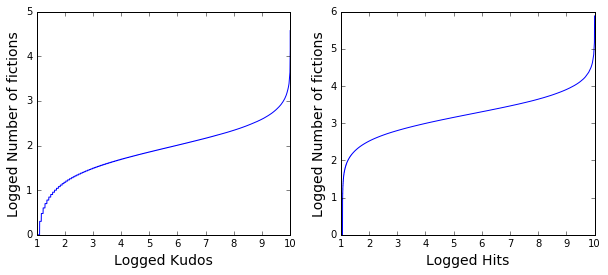

In [25]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)

Y = np.log10(sorted(x1))
N = len(Y)
X = np.logspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Kudos')
plt.xlabel('Logged Kudos',fontsize = '14')
plt.ylabel("Logged Number of fictions", fontsize='14')

plt.subplot(1, 2, 2)

Y = np.log10(sorted(x2))
N = len(Y)
X = np.logspace( 1/N, 1, num=N)
plt.plot(X,Y, label='Hits')
plt.xlabel('Logged Hits',fontsize = '14')
plt.ylabel("Logged Number of fictions", fontsize='14')
plt.savefig('kudos_hits_dist.png', type='png')

